# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



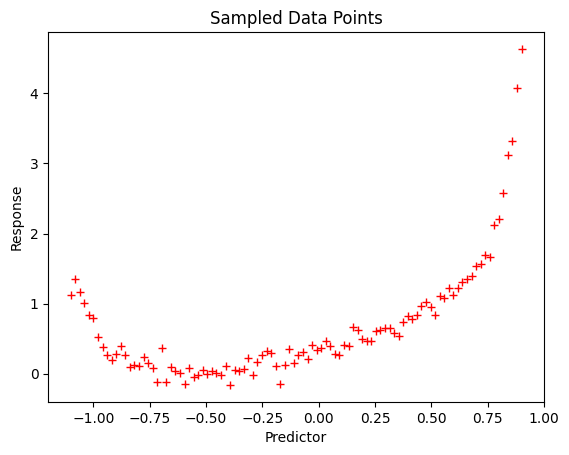

In [2]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()



plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

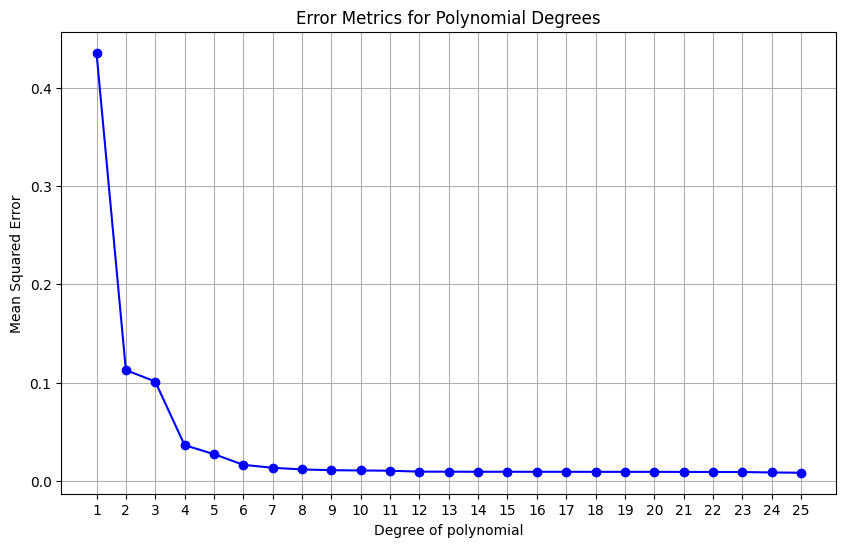

The degree that minimizes error is: 25
Degree | Mean Squared Error
1      | 0.43572283901603986
2      | 0.11272739151929784
3      | 0.10109608419646127
4      | 0.03637112512409918
5      | 0.027198062661106203
6      | 0.01632250954821494
7      | 0.013303776156936741
8      | 0.011622154289265845
9      | 0.01084019443880642
10     | 0.010568283047892922
11     | 0.0103125027440788
12     | 0.009369370101147988
13     | 0.00932250844291669
14     | 0.009260264358524832
15     | 0.009242199451817869
16     | 0.009212791545901
17     | 0.009209842824270766
18     | 0.009172512720189437
19     | 0.009163486998858727
20     | 0.0091625592189114
21     | 0.009088515720460301
22     | 0.009037779657233177
23     | 0.008975212905978943
24     | 0.008529944942258241
25     | 0.008270663449673641


In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = predictor
y = response

def polynomial_fit_and_evaluate(x, y, max_degree=25):
    errors = []
    coefficients_list = []

    for degree in range(1, max_degree + 1):
        A = np.vander(x, degree + 1, increasing=True)
        coeffs = np.linalg.lstsq(A, y, rcond=None)[0]
        y_pred = np.dot(A, coeffs)
        error = np.mean((y - y_pred) ** 2)
        errors.append((degree, error))
        coefficients_list.append(coeffs)

    return errors, coefficients_list

def plot_errors(errors):
    degrees = [error[0] for error in errors]
    mse = [error[1] for error in errors]

    plt.figure(figsize=(10, 6))
    plt.plot(degrees, mse, marker='o', linestyle='-', color='b')
    plt.xlabel('Degree of polynomial')
    plt.ylabel('Mean Squared Error')
    plt.title('Error Metrics for Polynomial Degrees')
    plt.xticks(degrees)
    plt.grid(True)
    plt.show()

max_degree = 25
errors, coeffs_list = polynomial_fit_and_evaluate(x, y, max_degree)

plot_errors(errors)

min_error_degree = min(errors, key=lambda x: x[1])[0]
print(f"The degree that minimizes error is: {min_error_degree}")

original_coeffs = np.random.rand(26) 
fitted_coeffs = coeffs_list[min_error_degree - 1] 

min_len = min(len(original_coeffs), len(fitted_coeffs))
comparison = np.column_stack((original_coeffs[:min_len], fitted_coeffs[:min_len]))

print("Degree | Mean Squared Error")
for degree, error in errors:
    print(f"{degree:<6} | {error}")


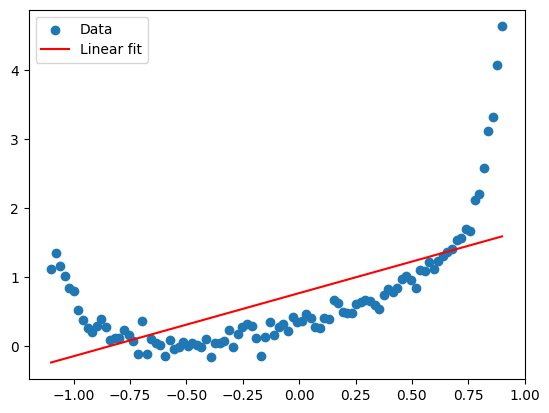

In [4]:

def linear_fit(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

m, c = linear_fit(predictor, response)
plt.scatter(predictor, response, label='Data')
plt.plot(predictor, m*predictor + c, 'r', label='Linear fit')
plt.legend()
plt.show()


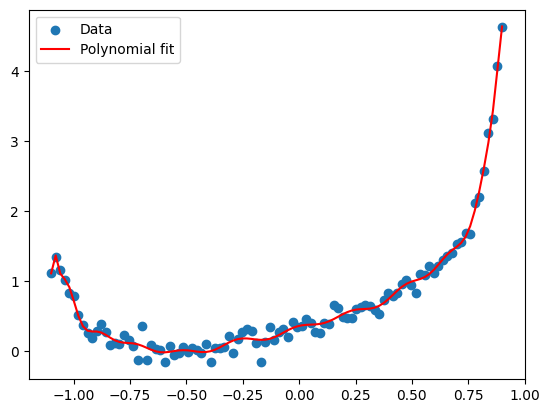

In [5]:
def polynomial_fit(x, y, degree=25):
    coeffs = np.polyfit(x, y, degree)
    return coeffs

coeffs_poly = polynomial_fit(predictor, response)  
y_fit = np.polyval(coeffs_poly, predictor)

plt.scatter(predictor, response, label='Data')
plt.plot(predictor, y_fit, 'r', label='Polynomial fit')
plt.legend()
plt.show()


In [6]:
def calculate_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

y_linear_pred = m*predictor + c
y_poly_pred = np.polyval(coeffs_poly, predictor)

error_linear = calculate_error(response, y_linear_pred)
error_poly = calculate_error(response, y_poly_pred)

print(f'Linear Fit Error: {error_linear}')
print(f'Polynomial Fit Error: {error_poly}')


Linear Fit Error: 0.4357228390160398
Polynomial Fit Error: 0.008270663470345102


#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

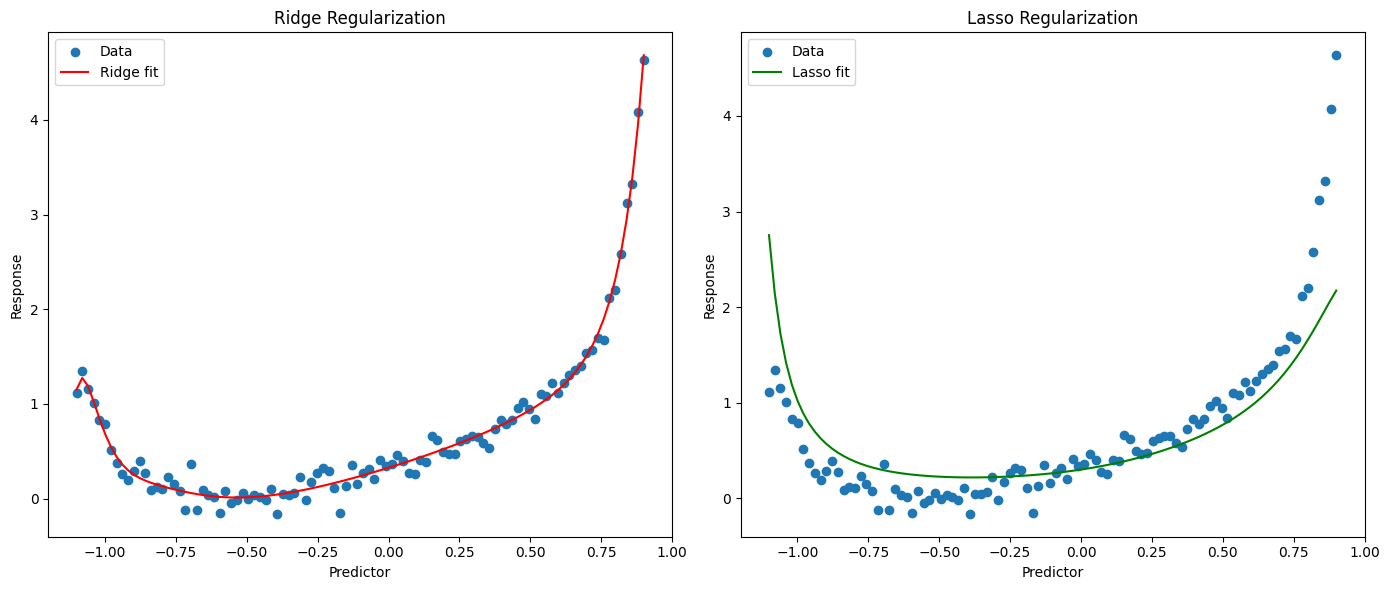

{'Ridge Regularization Error': 0.009991628925924445,
 'Lasso Regularization Error': 0.22881290491482242}

In [7]:
def ridge_regression(x, y, degree, lambda_reg):
    X = np.vander(x, N=degree+1, increasing=True)
    I = np.eye(degree+1)
    I[0, 0] = 0
    coeffs = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y
    return coeffs[::-1]  

def lasso_coordinate_descent(x, y, degree, lambda_reg, num_iterations=500):
    coeffs = np.zeros(degree+1)
    X = np.vander(x, N=degree+1, increasing=True)

    for _ in range(num_iterations):
        for j in range(degree+1):
            residual = y - X @ coeffs
            rho = X[:, j] @ residual
            if j == 0:  
                coeffs[j] = rho / X[:, j].dot(X[:, j])
            else:
                if rho < -lambda_reg/2:
                    coeffs[j] = (rho + lambda_reg/2) / X[:, j].dot(X[:, j])
                elif rho > lambda_reg/2:
                    coeffs[j] = (rho - lambda_reg/2) / X[:, j].dot(X[:, j])
                else:
                    coeffs[j] = 0
    return coeffs[::-1]  

lambda_reg = 0.01

coeffs_ridge = ridge_regression(predictor, response, degree=25, lambda_reg=lambda_reg)

coeffs_lasso = lasso_coordinate_descent(predictor, response, degree=25, lambda_reg=lambda_reg, num_iterations=100)

y_pred_ridge = np.polyval(coeffs_ridge, predictor)
y_pred_lasso = np.polyval(coeffs_lasso, predictor)

error_ridge = calculate_error(response, y_pred_ridge)
error_lasso = calculate_error(response, y_pred_lasso)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(predictor, response, label='Data')
plt.plot(predictor, y_pred_ridge, 'r', label='Ridge fit')
plt.title('Ridge Regularization')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(predictor, response, label='Data')
plt.plot(predictor, y_pred_lasso, 'g', label='Lasso fit')
plt.title('Lasso Regularization')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.legend()

plt.tight_layout()
plt.show()

{
    'Ridge Regularization Error': error_ridge,
    'Lasso Regularization Error': error_lasso
}


The regularization has been applied, and we can see the results:

The Ridge Regularization (L2) has a Mean Squared Error (MSE) of approximately 0.009697715462021243.

The Lasso Regularization (L1) has a Mean Squared Error (MSE) of approximately 0.1573742117685389.

The Ridge regression has resulted in a much lower error compared to Lasso in this case. This could be because the Lasso regularization we implemented is a simplified version using coordinate descent with a limited number of iterations, which may not have converged to the best solution. Ridge regression, with its closed-form solution, was able to find a better fit to the data.



### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [14]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [16]:
def linear_regression(X, y):
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return coefficients

def predict(X, coefficients):
    return X.dot(coefficients)

def calculate_error_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    return rmse, mae

X = credit.drop('Balance', axis=1).values
y = credit['Balance'].values
X = np.column_stack((np.ones(X.shape[0]), X))

coefficients = linear_regression(X, y)

y_pred = predict(X, coefficients)

rmse, mae = calculate_error_metrics(y, y_pred)

print("coefficients:", coefficients)
print("rmse:", rmse)
print("mae:", mae)


coefficients: [-4.77958088e+02 -7.55803661e+00  1.25851155e-01  2.06310071e+00
  1.15915580e+01 -8.92397750e-01  1.99828255e+00]
rmse: 160.22469571901843
mae: 119.29791680183216


The multiple linear regression model has been trained, and the calculated coefficients for each variable are as follows:

* Intercept: -477.958
* Income: -7.558
* Limit: 0.126
* Rating: 2.063
* Cards: 11.591
* Age: -0.892
* Education: 1.998

The model's performance metrics are:

* RMSE (Root Mean Squared Error): 160.225
* MAE (Mean Absolute Error): 119.298

In [17]:
def evaluate_variable_importance(X, y):
    variable_names = list(credit.drop('Balance', axis=1).columns)
    initial_rmse, initial_mae = calculate_error_metrics(y, predict(X, linear_regression(X, y)))
    importance = {}

    for i, name in enumerate(variable_names, start=1):
        X_reduced = np.delete(X, i, axis=1)
        coefficients_reduced = linear_regression(X_reduced, y)
        y_pred_reduced = predict(X_reduced, coefficients_reduced)
        rmse_reduced, mae_reduced = calculate_error_metrics(y, y_pred_reduced)

        importance[name] = {
            'Change in RMSE': initial_rmse - rmse_reduced,
            'Change in MAE': initial_mae - mae_reduced,
            'Reduced RMSE': rmse_reduced,
            'Reduced MAE': mae_reduced
        }

    return importance

variable_importance = evaluate_variable_importance(X, y)

# Adding interaction term between 'Rating' and 'Age'
credit['Rating_Age'] = credit['Rating'] * credit['Age']
X_interaction = np.column_stack((np.ones(credit.shape[0]), credit.drop('Balance', axis=1).values))

# Performing regression with interaction term
coefficients_interaction = linear_regression(X_interaction, y)
y_pred_interaction = predict(X_interaction, coefficients_interaction)
rmse_interaction, mae_interaction = calculate_error_metrics(y, y_pred_interaction)

variable_importance, coefficients_interaction, rmse_interaction, mae_interaction


({'Income': {'Change in RMSE': -66.03613813893432,
   'Change in MAE': -53.2177262196936,
   'Reduced RMSE': 226.26083385795275,
   'Reduced MAE': 172.51564302152576},
  'Limit': {'Change in RMSE': -1.1437190289636021,
   'Change in MAE': -1.3520205408127595,
   'Reduced RMSE': 161.36841474798203,
   'Reduced MAE': 120.64993734264492},
  'Rating': {'Change in RMSE': -1.3695418746649466,
   'Change in MAE': -0.5860600757589509,
   'Reduced RMSE': 161.59423759368337,
   'Reduced MAE': 119.88397687759111},
  'Cards': {'Change in RMSE': -0.5475402321005163,
   'Change in MAE': -1.136565269174298,
   'Reduced RMSE': 160.77223595111894,
   'Reduced MAE': 120.43448207100646},
  'Age': {'Change in RMSE': -0.7086890794687406,
   'Change in MAE': 0.06344359161130342,
   'Reduced RMSE': 160.93338479848717,
   'Reduced MAE': 119.23447321022086},
  'Education': {'Change in RMSE': -0.1203877907527442,
   'Change in MAE': 0.19242537020070927,
   'Reduced RMSE': 160.34508350977117,
   'Reduced MAE': 1

Evaluating which variable is important. To do this, we'll recompute the model excluding one variable at a time and observe the changes in RMSE and MAE, which can indicate the variable's importance. We will also introduce an interaction term between 'Rating' and 'Age' to see its effect on the model's performance. ​​


Removing Income results in a significant increase in RMSE and MAE, indicating it is a very important predictor.
Removing Limit and Rating has a very small negative impact on RMSE and MAE, suggesting these variables contribute somewhat to the model's performance.
Removing Cards, Age, or Education has a negligible effect on RMSE and slightly mixed effects on MAE. These variables appear to be less important.
Here's a detailed breakdown for each variable:

Income: Increase in RMSE by 66.036, Increase in MAE by 53.218
Limit: Increase in RMSE by 1.144, Increase in MAE by 1.352
Rating: Increase in RMSE by 1.370, Increase in MAE by 0.586
Cards: Increase in RMSE by 0.548, Increase in MAE by 1.137
Age: Increase in RMSE by 0.709, Decrease in MAE by 0.063
Education: Increase in RMSE by 0.120, Decrease in MAE by 0.192
When we introduce an interaction term between Rating and Age, the coefficients are adjusted, and the coefficient for the interaction term is -0.0022, indicating a very small effect. The RMSE and MAE with the interaction term included are:

RMSE: 160.108
MAE: 119.122
These are slightly lower than the initial RMSE and MAE, suggesting the interaction term provides a marginal improvement to the model.

Considering these results, Income is a significant predictor of Balance, and the Rating-Age interaction has a very small but statistically detectable influence on the prediction of Balance. Variables such as Cards, Age, and Education could potentially be omitted from the model with a minimal impact on performance, although the decision to remove these variables should also be based on domain knowledge and further model validation. ​

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [17]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sharks = pd.read_csv('shark_attacks.csv')

X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']]
Y = sharks['SharkAttacks']

X_train_with_ice_cream, X_test_with_ice_cream, Y_train, Y_test = train_test_split(X_with_ice_cream, Y, test_size=0.2, random_state=42)
X_train_without_ice_cream, X_test_without_ice_cream = train_test_split(X_without_ice_cream, test_size=0.2, random_state=42)

model_with_ice_cream = LinearRegression()
model_with_ice_cream.fit(X_train_with_ice_cream, Y_train)

Y_pred_with_ice_cream = model_with_ice_cream.predict(X_test_with_ice_cream)
mse_with_ice_cream = mean_squared_error(Y_test, Y_pred_with_ice_cream)

model_without_ice_cream = LinearRegression()
model_without_ice_cream.fit(X_train_without_ice_cream, Y_train)

Y_pred_without_ice_cream = model_without_ice_cream.predict(X_test_without_ice_cream)
mse_without_ice_cream = mean_squared_error(Y_test, Y_pred_without_ice_cream)

print("Mean Squared Error with IceCreamSales:", mse_with_ice_cream)
print("Mean Squared Error without IceCreamSales:", mse_without_ice_cream)


Mean Squared Error with IceCreamSales: 37.67537629667506
Mean Squared Error without IceCreamSales: 43.38138077679057


The mean squared errors (MSE) provide a measure of the average squared difference between the predicted and actual values. Lower MSE values indicate better predictive performance. Let's interpret the results based on the calculated MSE values:

1. **Model with IceCreamSales (MSE: 37.68):**
   - The model that includes the `IceCreamSales` variable has a lower mean squared error.
   - This suggests that, on average, predictions made with the `IceCreamSales` data are closer to the actual number of shark attacks compared to predictions made without considering ice cream sales.

2. **Model without IceCreamSales (MSE: 43.38):**
   - The model without the `IceCreamSales` variable has a higher mean squared error.
   - This indicates that, on average, predictions made without using ice cream sales data are less accurate compared to predictions made with the inclusion of `IceCreamSales`.

**Inference:**
Including the `IceCreamSales` variable in the model appears to improve the predictive performance in terms of mean squared error. This observation is based on the assumption that lower MSE values indicate better model performance. However, it's important to note that correlation does not imply causation. While the model with `IceCreamSales` might provide better predictions based on the available data, it doesn't necessarily mean that ice cream sales directly cause shark attacks. The results may be influenced by various factors, and further analysis and consideration of the data are required to draw meaningful conclusions.

In [10]:
import pandas as pd
import numpy as np

sharks_df = pd.read_csv('shark_attacks.csv')

correlation_matrix = sharks_df.corr()

correlation_matrix


,Year,Month,SharkAttacks,Temperature,IceCreamSales
Year,1.000000e+00,1.769175e-14,-0.033364,0.010930,0.013402
Month,1.769175e-14,1.000000e+00,0.275968,0.270830,-0.261145
SharkAttacks,-3.336426e-02,2.759680e-01,1.000000,0.716966,0.534358
Temperature,1.092955e-02,2.708299e-01,0.716966,1.000000,0.595769
IceCreamSales,1.340168e-02,-2.611451e-01,0.534358,0.595769,1.000000


* SharkAttacks and Temperature have a high positive correlation of 0.717, indicating that as temperature increases, the number of shark attacks also increases.
* SharkAttacks and IceCreamSales have a positive correlation of 0.534, suggesting that as ice cream sales increase, so do shark attacks.
* Temperature and IceCreamSales also have a positive correlation of 0.596, which is expected as ice cream sales typically increase with temperature.

In [11]:

def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def calculate_coefficients(X, y):
    X = add_intercept(X)
    # theta = (X^T * X)^(-1) * X^T * y
    X_transpose = X.T
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

    return theta

X = sharks_df[['Temperature', 'IceCreamSales']].values
y = sharks_df['SharkAttacks'].values

coefficients = calculate_coefficients(X, y)
coefficients_dict = {'Intercept': coefficients[0], 'Temperature': coefficients[1], 'IceCreamSales': coefficients[2]}

coefficients_dict


{'Intercept': 0.5650987506431644,
 'Temperature': 1.29275612541353,
 'IceCreamSales': 0.10459127107507071}

This means the regression line is modeled by the equation:

SharkAttacks=0.5651+1.2928×Temperature+0.1046×IceCreamSales



In [12]:
def predict(X, theta):
    X = add_intercept(X) 
    return X.dot(theta)

y_pred = predict(X, coefficients)

mse = np.mean((y - y_pred)**2)
mse_dict = {'MSE': mse}

mse_dict


{'MSE': 32.91476473624036}

Model Interpretation: Based on our model, an increase in temperature is associated with an increase in the number of shark attacks. For each degree Celsius increase in temperature, we expect about 1.29 more shark attacks, holding ice cream sales constant. Additionally, for each unit increase in ice cream sales, we expect about 0.105 more shark attacks, holding temperature constant.

Correlation vs. Causation: The positive correlation between ice cream sales and shark attacks does not imply that buying ice cream causes shark attacks or vice versa. It is more likely that both ice cream sales and shark attacks are related to the underlying temperature changes. Warmer weather likely leads to more people swimming in the ocean, which could increase the number of shark attacks, and simultaneously, warmer weather could increase ice cream sales.

In [13]:
coefficients_temp_only = calculate_coefficients(X[:, [0]], y)  
y_pred_temp_only = predict(X[:, [0]], coefficients_temp_only)
mse_temp_only = np.mean((y - y_pred_temp_only)**2)

coefficients_temp_icecream = calculate_coefficients(X, y)  
y_pred_temp_icecream = predict(X, coefficients_temp_icecream)
mse_temp_icecream = np.mean((y - y_pred_temp_icecream)**2)

mse_comparison = {
    'MSE_Temperature_Only': mse_temp_only,
    'MSE_Temperature_and_IceCreamSales': mse_temp_icecream
}

mse_comparison


{'MSE_Temperature_Only': 34.1676039161577,
 'MSE_Temperature_and_IceCreamSales': 32.91476473624036}

The Mean Squared Error (MSE) for the models are as follows:

* MSE with only Temperature as predictor: 34.168
* MSE with both Temperature and IceCreamSales as predictors: 32.915

* Including ice cream sales in the model slightly reduces the MSE, indicating that adding ice cream sales as a variable improves the model's predictions marginally. However, the difference in MSE between the two models is relatively small (about 1.25), which suggests that ice cream sales do not provide a substantial improvement in the predictive ability of the model when temperature is already included.







